In [1]:
import imgkit as imgkit
import numpy
import scipy
import pandas
import pyswarm
import random
from matplotlib import pyplot

In [2]:
eps = 0.001
max_iter = 1000

In [3]:
def f(x):
    return 1/(x**2 -3*x + 2)

In [4]:
xk = []
yk = []

for k in range(max_iter):
    xk.append((3*k)/1000)
    if f(xk[k])< -100:
        yk.append(-100 + numpy.random.normal(0,1))
    if -100 <= f(xk[k]) <= 100:
        yk.append(f(xk[k]) + numpy.random.normal(0,1))
    if f(xk[k]) > 100:
        yk.append(100 + numpy.random.normal(0,1))

for k in range(max_iter):
    if (xk[k] == 1) or (xk[k] == 1):
        print(k)

In [5]:
def rational_func(x,a,b,c,d):
    return (a*x + b)/(x**2 + c*x + d)

In [6]:
def least_squares(x, f=rational_func):
    sum = 0
    for k in range(max_iter):
        sum += (f(xk[k], x[0], x[1], x[2], x[3]) - yk[k])**2
    return sum

In [7]:
def neldermead_search(f):
    return scipy.optimize.minimize(
        f,
        x0=([0, 0, 0, 0]),
        method='Nelder-Mead',
        tol=eps
    )

def levenberg_marquardt_algorithm(f, x, y):
    return scipy.optimize.curve_fit(
        f,
        xdata=x,
        ydata=y,
        method='lm'
    )

def differential_evolution(f):
    return scipy.optimize.differential_evolution(
        f,
        bounds=[(-2, 2), (-2, 2), (-2, 2), (-2, 2)],
        tol=eps
    )

def particle_swarm_optimization(f):
    return pyswarm.pso(
        f,
        lb=(-2, -2, -2, -2),
        ub=(2, 2, 2, 2),
        maxiter=100,
        minstep=eps
    )

In [8]:
import time

start = time.time()
a_nm, b_nm, c_nm, d_nm = neldermead_search(least_squares).x
time_nm = time.time()-start

start = time.time()
a_lm, b_lm, c_lm, d_lm = levenberg_marquardt_algorithm(rational_func, xk, yk)[0]
time_lm = time.time()-start

start = time.time()
a_de, b_de, c_de, d_de = differential_evolution(least_squares).x
time_de = time.time()-start

start = time.time()
a_pso, b_pso, c_pso, d_pso = particle_swarm_optimization(least_squares)[0]
time_pso = time.time()-start

/var/folders/03/v_m1lfqs5qn1fgrt7j_w1lgm0000gn/T/ipykernel_2913/3669770768.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (a*x + b)/(x**2 + c*x + d)
/var/folders/03/v_m1lfqs5qn1fgrt7j_w1lgm0000gn/T/ipykernel_2913/3669770768.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (a*x + b)/(x**2 + c*x + d)


Stopping search: Swarm best position change less than 0.001


In [9]:
result = pandas.DataFrame([
    ['Nelder-Mead Method', a_nm, b_nm, c_nm, d_nm, time_nm],
    ['Levenberg-Marquardt Method', a_lm, b_lm, c_lm, d_lm, time_lm],
    ['Differential Evolution', a_de, b_de, c_de, d_de, time_de],
    ['Particle Swarm Optimization', a_pso, b_pso, c_pso, d_pso, time_pso]],
    columns=['Method','a', 'b','c','d', 'time'])
result

,Method,a,b,c,d,time
0,Nelder-Mead Method,0.025142,-0.028381,-2.022690,1.022845,1.047542
1,Levenberg-Marquardt Method,-1.013183,1.013670,-2.000881,1.000898,0.005370
2,Differential Evolution,-1.005879,1.006137,-2.000000,1.000017,10.867584
3,Particle Swarm Optimization,-2.000000,2.000000,-2.000000,1.011451,1.032932


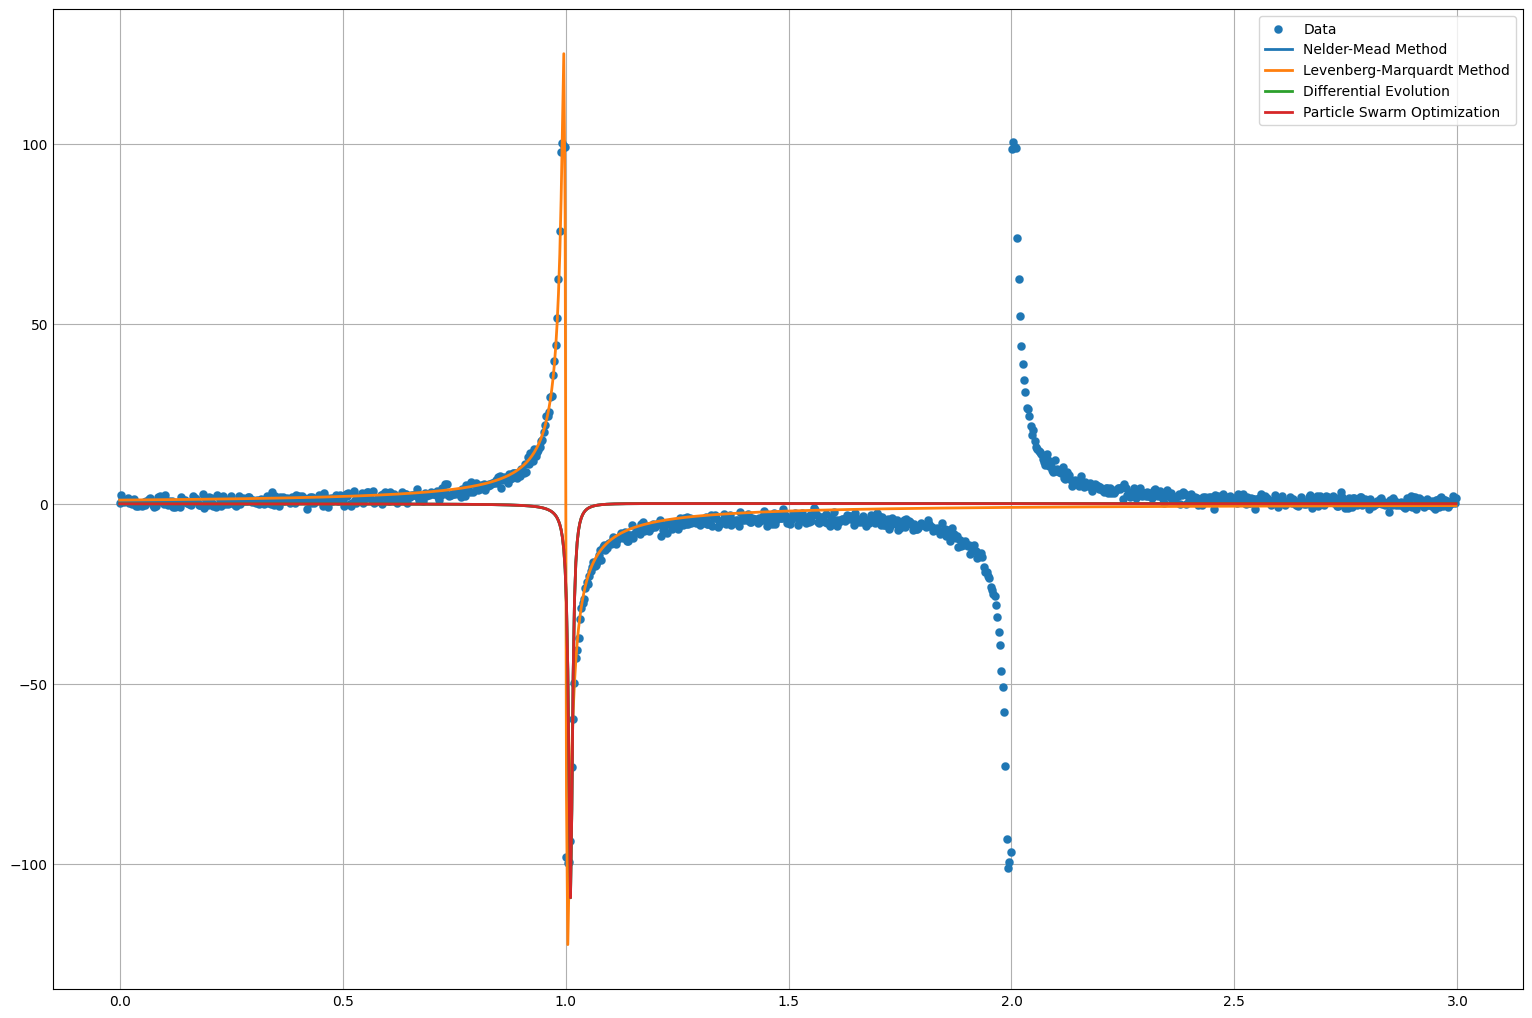

In [10]:
pyplot.style.use('_mpl-gallery')
pyplot.figure(figsize=(15, 10))
pyplot.scatter(xk, yk, label='Data', linewidths=0.1)

y = [rational_func(x, a_nm, b_nm, c_nm, d_nm) for x in xk]
pyplot.plot(xk, y, label='Nelder-Mead Method', linewidth=2)

y = [rational_func(x, a_lm, b_lm, c_lm, d_lm) for x in xk]
pyplot.plot(xk, y, label='Levenberg-Marquardt Method', linewidth=2)

y = [rational_func(x, a_nm, b_nm, c_nm, d_nm) for x in xk]
pyplot.plot(xk, y, label='Differential Evolution', linewidth=2)

y = [rational_func(x, a_nm, b_nm, c_nm, d_nm) for x in xk]
pyplot.plot(xk, y, label='Particle Swarm Optimization', linewidth=2)




pyplot.legend()
pyplot.savefig('out.png')
pyplot.show()


In [11]:
cities = pandas.read_csv('data.csv')
cities

,City,Longitude,Latitude
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01
5,6,-2.905850e+01,-4.321670e+01
6,7,-7.207850e+01,1.815810e-01
7,8,-3.603660e+01,-2.161350e+01
8,9,-5.048080e+01,7.374470e+00
9,10,-5.058590e+01,-2.158820e+01


In [12]:
n =15
def read_coordinates(cities):
    coordinates = []
    for index in range(n):
        coord = [cities.loc[index, 'Longitude'], cities.loc[index, 'Latitude']]
        coordinates.append(coord)
    return coordinates

def plot(path, points, cities, title):
    pyplot.figure(figsize=(20, 10))

    x = []
    y = []
    for index, data in enumerate(path[0]):
        x.append(points[data][0])
        y.append(points[data][1])

    for index in range(n):
        pyplot.text(cities.loc[index, 'Longitude']+1, cities.loc[index, 'Latitude']+1, str(cities.loc[index, 'City']), size=10)

    pyplot.scatter(x, y, s=5, c='black')
    pyplot.text((x[-1]+x[0])/2, (y[-1]+y[0])/2, str(1), size=1)
    pyplot.arrow(x[-1], y[-1], (x[0]-x[-1]), (y[0]-y[-1]),
              head_width=1, color ='purple', length_includes_head=True)

    for i in range(0, len(x)-1):
        pyplot.arrow(x[i], y[i], (x[i+1]-x[i]), (y[i+1]-y[i]),
                  head_width=1, color='purple', length_includes_head=True)
        pyplot.text((x[i]+x[i+1])/2, (y[i]+y[i+1])/2, str(i+2), size=10)

    pyplot.grid()
    pyplot.savefig('out_sa.png')
    pyplot.show()

In [13]:
class Annealing(object):
    def __init__(self, coordinates, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1, path=cities):
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = numpy.sqrt(self.N) if T == -1 else T
        self.T_save = self.T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-6 if stopping_T == -1 else stopping_T
        self.stopping_iter = 1000000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1
        self.path = path

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float('Inf')
        self.fitness_list = []

    def initial_solution(self):
        cur_node = random.choice(self.nodes)
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def dist(self, node_0, node_1):
        coord_0, coord_1 = self.coordinates[node_0], self.coordinates[node_1]
        return numpy.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        cur_fit = 0
        for i in range(self.N):
            cur_fit = cur_fit + self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        return numpy.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        candidate_fitness = self.fitness(candidate)

        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print('First Simulated Annealing Route Length:{:.1f}'.format(self.best_fitness))
        plot([self.cur_solution], self.coordinates, self.path, 'First Simulated Annealing Route')

        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T = self.T * self.alpha
            self.iteration = self.iteration + 1

            self.fitness_list.append(self.cur_fitness)

        print('Fastest Route Length: {:.1f}'.format(self.best_fitness))
        print('Number of Iterations:', self.iteration)

        plot([self.best_solution], self.coordinates, self.path, 'Fastest Route')

First Simulated Annealing Route Length:284.4


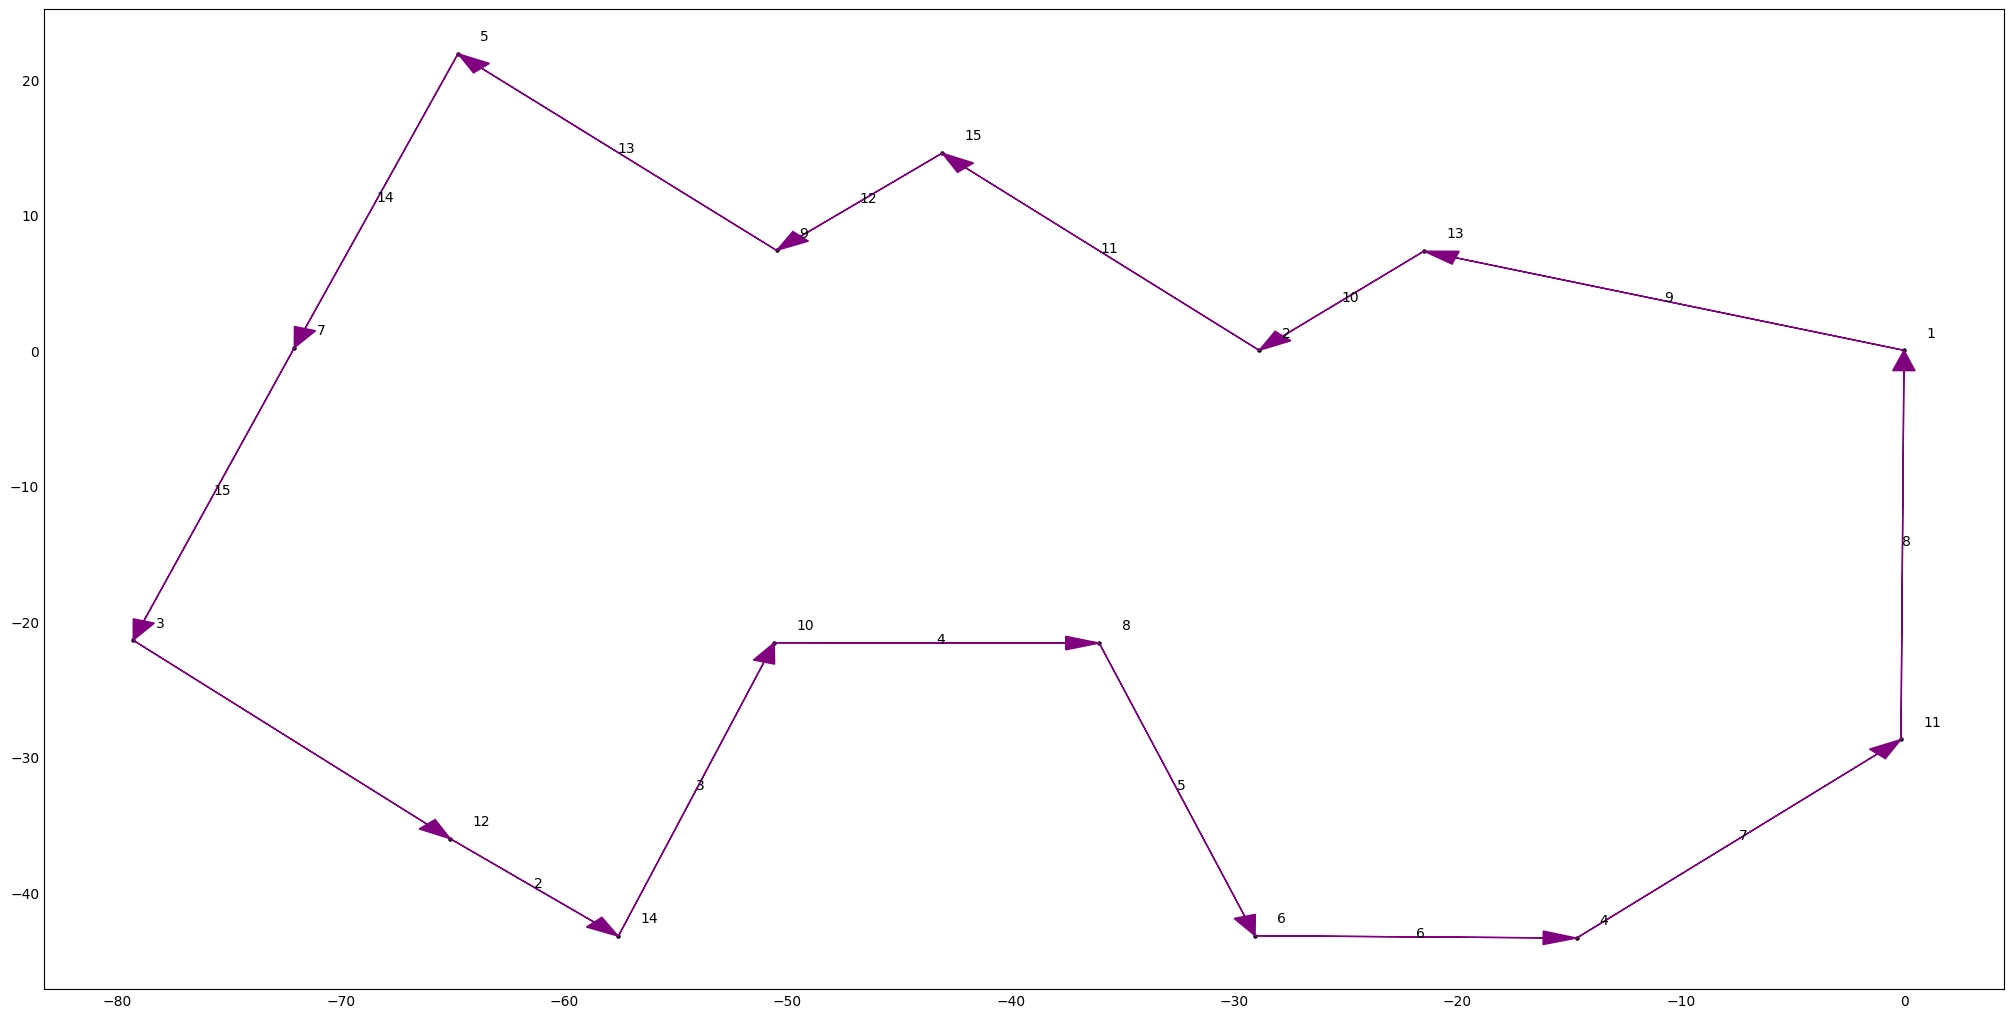

Fastest Route Length: 284.4
Number of Iterations: 3028


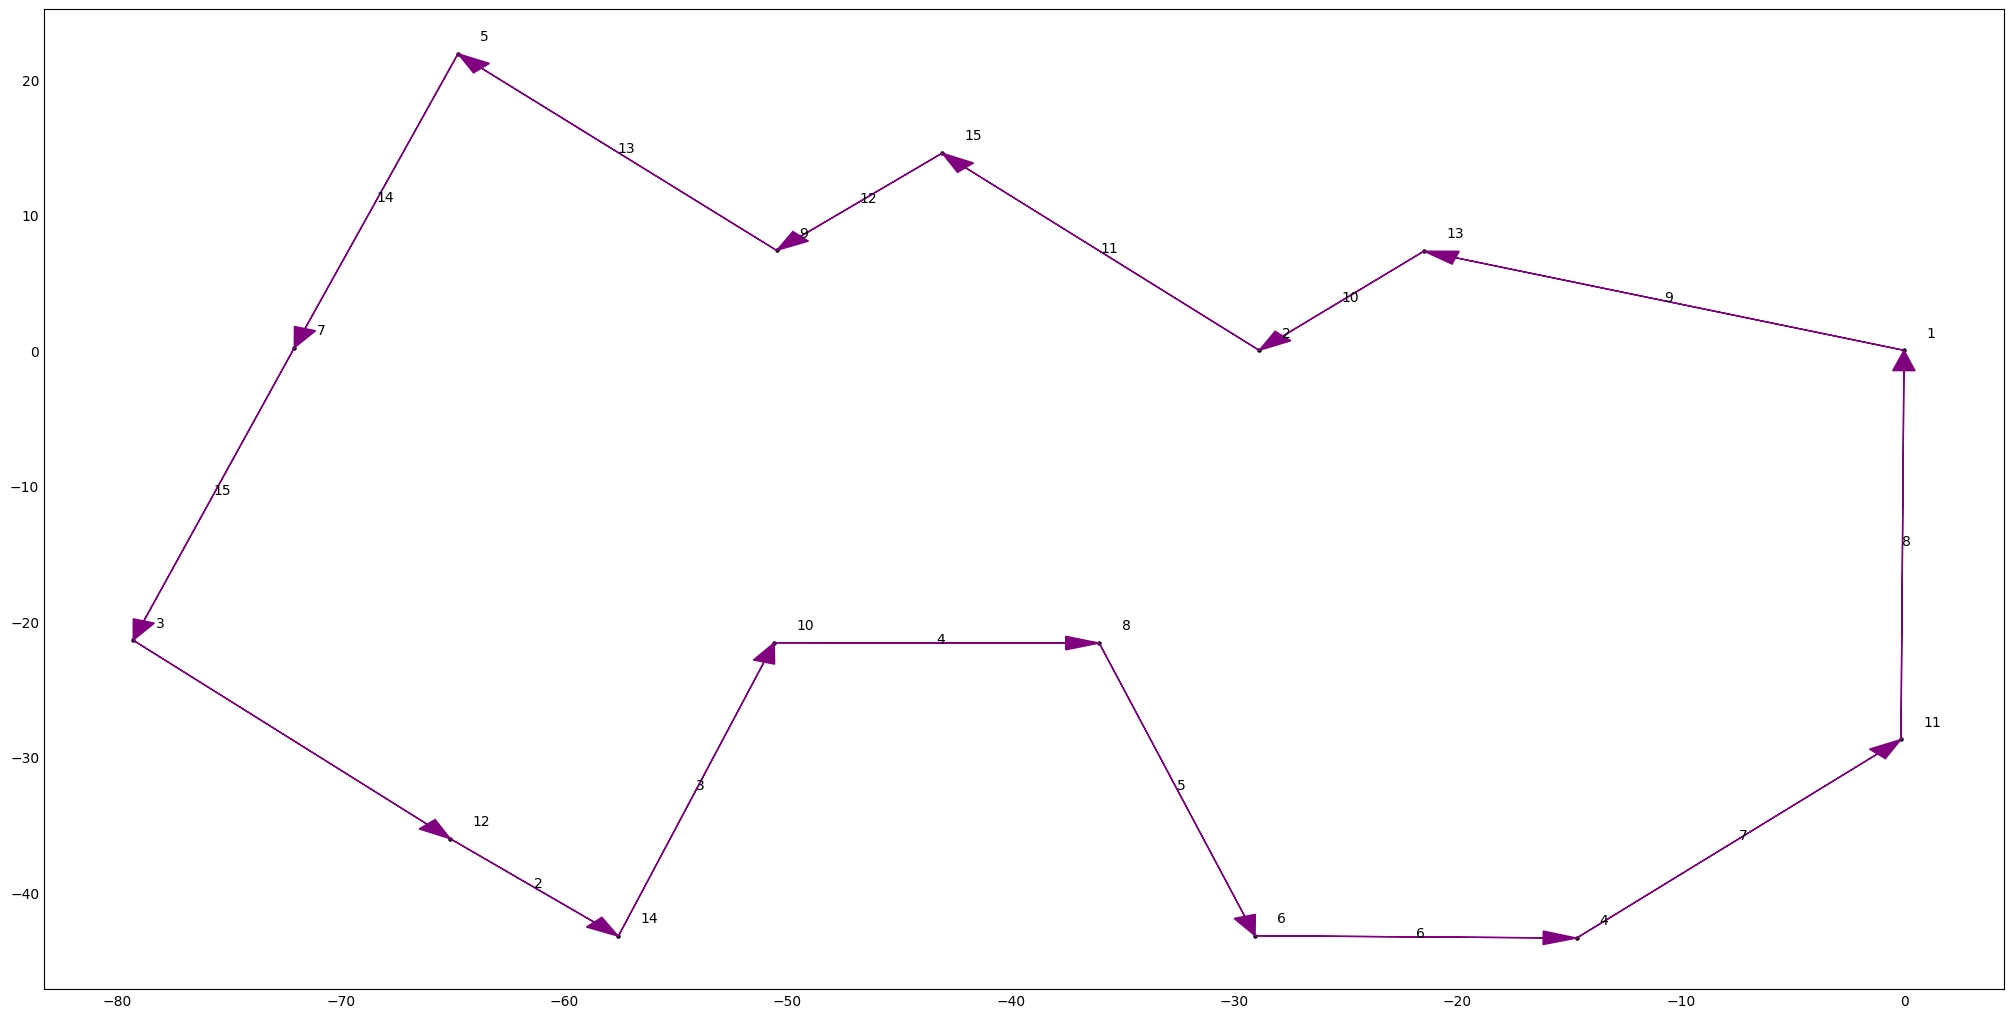

In [14]:
coordinates = read_coordinates(cities)
simulated_annealing = Annealing(coordinates=coordinates, stopping_iter=1000, path=cities)
simulated_annealing.anneal()